# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Carregando DataFrames

### Fontes:

Número de votos por múnicipios: https://www.tse.jus.br  
População dos múnicipios 2021:  https://github.com/mapaslivres/municipios-br  
PIB per capita dos múnicipios 2020: https://www.ibge.gov.br/

In [2]:
votos_municipio = pd.read_csv('votacao_municipio.csv', sep=';', encoding='latin-1')
pop_municipio = pd.read_csv('municipios.csv', sep=',', encoding='utf-8')
pib = pd.read_excel('pib.xls')

# Checando DataFrames

In [3]:
votos_municipio.head(2)

,sg_uf,nm_municipio,cd_cargo,ds_cargo,nr_candidato,nm_candidato,nm_urna_candidato,sg_partido,ds_composicao_coligacao,nr_turno,ds_sit_totalizacao,dt_ult_totalizacao,sg_ue,sq_candidato,nm_tipo_destinacao_votos,sq_eleicao_divulga,qt_votos_nom_validos
0,AC,ACRELÂNDIA,1,Presidente,22,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,PL,PP / REPUBLICANOS / PL,2,Não Eleito,2022-10-31 00:28:52,BR,280001618036,Válido,2040602022,5317
1,AC,ACRELÂNDIA,1,Presidente,13,LUIZ INÁCIO LULA DA SILVA,LULA,PT,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,2,Eleito,2022-10-31 00:28:52,BR,280001607829,Válido,2040602022,1460


In [4]:
pop_municipio.head(2)

,municipio,uf,uf_code,name,mesoregion,microregion,rgint,rgi,osm_relation_id,wikidata_id,is_capital,wikipedia_pt,lon,lat,no_accents,slug_name,alternative_names,pop_21
0,1100015,11,RO,Alta Floresta d'Oeste,1102,11006,1102,110005,325842,Q1761456,NaN,Alta Floresta d'Oeste,-61.999824,-11.935540,Alta Floresta d'Oeste,alta-floresta-doeste,NaN,22516
1,1100023,11,RO,Ariquemes,1102,11003,1101,110002,325888,Q1646975,NaN,Ariquemes,-63.033269,-9.908463,Ariquemes,ariquemes,NaN,111148


In [5]:
pib.head(2)

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


# Formatando DataFrames

In [6]:
#Removendo colunas que não serão utilizadas de votos_municipio

votos_municipio.drop(["cd_cargo", "ds_cargo", "nm_candidato", "nr_candidato", "sg_partido", "sg_partido", 
              "nr_turno", "ds_sit_totalizacao", "dt_ult_totalizacao", "sg_ue", "sq_candidato", 
              "nm_tipo_destinacao_votos", "sq_eleicao_divulga", "ds_composicao_coligacao"], axis=1, inplace=True)

#Removendo colunas que não serão utilizadas de pop_municipio

pop_municipio.drop(["municipio", "uf", "mesoregion", "microregion", "rgint", "rgi", "osm_relation_id",
                    "wikidata_id", "is_capital", "wikipedia_pt", "lon", "lat", "no_accents", "slug_name",
                    "alternative_names",], axis=1, inplace=True)

# Removendo colunas que não serão utilizadas de pib

pib.drop(["Código da Grande Região", "Nome da Grande Região", "Código da Unidade da Federação",  
            "Nome da Unidade da Federação", "Código do Município", "Região Metropolitana",
            "Código da Mesorregião", 'Nome da Mesorregião','Código da Microrregião', 'Nome da Microrregião',
            'Código da Região Geográfica Imediata', 'Nome da Região Geográfica Imediata',
            'Município da Região Geográfica Imediata','Código da Região Geográfica Intermediária',
            'Nome da Região Geográfica Intermediária', 'Município da Região Geográfica Intermediária',
            'Código Concentração Urbana', 'Nome Concentração Urbana','Tipo Concentração Urbana', 
            'Código Arranjo Populacional','Nome Arranjo Populacional', 'Hierarquia Urbana',
            'Hierarquia Urbana (principais categorias)', 'Código da Região Rural', 'Nome da Região Rural',
            'Região rural (segundo classificação do núcleo)', 'Amazônia Legal','Semiárido', 
            'Cidade-Região de São Paulo','Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)',
            "Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)",
            "Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)",
            "Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)",
            "Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)",
            "Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)",
            "Produto Interno Bruto, \na preços correntes\n(R$ 1.000)",
            "Atividade com maior valor adicionado bruto",
            "Atividade com segundo maior valor adicionado bruto",
            "Atividade com terceiro maior valor adicionado bruto",], axis=1, inplace=True)

#Deixando os nomes dos municipios em uppercase para posterior comparação

pop_municipio['name'] = pop_municipio['name'].str.upper()


In [7]:
# Merge dos dataframes Votos e População
votos_pop_municipio = pd.merge(votos_municipio, pop_municipio, left_on=['nm_municipio', 'sg_uf'], right_on=['name', 'uf_code'])

# Removendo colunas extras
votos_pop_municipio.drop(["name", "uf_code"], axis=1, inplace=True)

In [8]:
votos_pop_municipio.head(2)

,sg_uf,nm_municipio,nm_urna_candidato,qt_votos_nom_validos,pop_21
0,AC,ACRELÂNDIA,JAIR BOLSONARO,5317,15721
1,AC,ACRELÂNDIA,LULA,1460,15721


In [9]:
# Filtrando range da população
remove_municipios = votos_pop_municipio[votos_pop_municipio['pop_21'].between(1, 1000000)]

# Reseta o index do Dataframe
remove_municipios.reset_index(drop=True, inplace=True)

In [10]:
# Removendo os governadores que passaram para o segundo turno selecionando apenas os candidatos a presidência e concatenando os dois dataframes

Votos_Lula = remove_municipios[remove_municipios['nm_urna_candidato'] == 'LULA']
Votos_Bolsonaro = remove_municipios[remove_municipios['nm_urna_candidato'] == 'JAIR BOLSONARO']
df_final = pd.concat([Votos_Lula, Votos_Bolsonaro], ignore_index=True)

In [11]:
Votos_Lula.reset_index(drop=True, inplace=True)
Votos_Bolsonaro.reset_index(drop=True, inplace=True)

In [12]:
Votos_Lula.head(2)

,sg_uf,nm_municipio,nm_urna_candidato,qt_votos_nom_validos,pop_21
0,AC,ACRELÂNDIA,LULA,1460,15721
1,AC,ASSIS BRASIL,LULA,1895,7649


In [13]:
Votos_Bolsonaro.head(2)

,sg_uf,nm_municipio,nm_urna_candidato,qt_votos_nom_validos,pop_21
0,AC,ACRELÂNDIA,JAIR BOLSONARO,5317,15721
1,AC,ASSIS BRASIL,JAIR BOLSONARO,2717,7649


# Construindo um novo DataFrame

In [14]:
df = pd.DataFrame(columns=['sg_uf','nm_municipio','Vencedor'])

In [15]:
# Preenchendo o dataFrame com UF e Municipio e False para Bolsonaro vencedor e True para Lula Vencedor

for item in Votos_Lula['nm_municipio']:
    df['sg_uf'] = Votos_Lula['sg_uf']
    df['nm_municipio'] = Votos_Lula['nm_municipio']
    df['Vencedor'] = Votos_Lula['qt_votos_nom_validos'] > Votos_Bolsonaro['qt_votos_nom_validos']

In [16]:
df.head()

,sg_uf,nm_municipio,Vencedor
0,AC,ACRELÂNDIA,False
1,AC,ASSIS BRASIL,False
2,AC,BRASILÉIA,False
3,AC,BUJARI,False
4,AC,CAPIXABA,False


In [18]:
# Alterando valor de True e False

df['Vencedor'].loc[(df['Vencedor'] == True)] = 'LULA'
df['Vencedor'].loc[(df['Vencedor'] == False)] = 'JAIR BOLSONARO'
warnings.filterwarnings('ignore')

In [19]:
df.head()

,sg_uf,nm_municipio,Vencedor
0,AC,ACRELÂNDIA,JAIR BOLSONARO
1,AC,ASSIS BRASIL,JAIR BOLSONARO
2,AC,BRASILÉIA,JAIR BOLSONARO
3,AC,BUJARI,JAIR BOLSONARO
4,AC,CAPIXABA,JAIR BOLSONARO


In [20]:
# Checando em quantos municipios o Bolsonaro venceu e em quantos municipios o Lula venceu

vitoriasLula = 0;
vitoriasBolsonaro = 0;
for item in df['Vencedor']:
    if item == 'JAIR BOLSONARO':
        vitoriasBolsonaro +=1
    else:
        vitoriasLula +=1

print(vitoriasBolsonaro)
print(vitoriasLula)

2425
3089


# Adicionando PIB ao DataFrame

In [21]:
# Renomenando as Colunas
pib.rename(columns={'Nome do Município': 'nm_municipio',
                    'Sigla da Unidade da Federação': 'sg_uf',
                    'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)': 'pib_per_capita'
                   }, inplace = True)

# Deixando o nome dos municipios em maisculo para padronização
pib['nm_municipio'] = pib['nm_municipio'].str.upper()

# Transformando o PIB em INT
pib['pib_per_capita'] = pib['pib_per_capita'].astype(int)

In [22]:
pib.head()

,Ano,sg_uf,nm_municipio,pib_per_capita
0,2010,RO,ALTA FLORESTA D'OESTE,10731
1,2010,RO,ARIQUEMES,15103
2,2010,RO,CABIXI,11033
3,2010,RO,CACOAL,15095
4,2010,RO,CEREJEIRAS,13037


In [23]:
# Pegando apenas o Ano de 2020 (mais recente)
pib = pib[pib['Ano'] == 2020]

In [24]:
pib.head(2)

,Ano,sg_uf,nm_municipio,pib_per_capita
55685,2020,RO,ALTA FLORESTA D'OESTE,25091
55686,2020,RO,ARIQUEMES,25730


In [25]:
# Merge entre o DF e o PIB com sigla UF pois existe diversos municipios com nomes iguais no Brasil
vencedor_pib = pd.merge(df, pib, left_on=['nm_municipio', 'sg_uf'], right_on=['nm_municipio', 'sg_uf'])

In [26]:
# Removendo a coluna Ano do Dataframe
vencedor_pib.drop(['Ano'], axis=1, inplace=True)

In [27]:
vencedor_pib.head(10)

,sg_uf,nm_municipio,Vencedor,pib_per_capita
0,AC,ACRELÂNDIA,JAIR BOLSONARO,19525
1,AC,ASSIS BRASIL,JAIR BOLSONARO,12864
2,AC,BRASILÉIA,JAIR BOLSONARO,17981
3,AC,BUJARI,JAIR BOLSONARO,17640
4,AC,CAPIXABA,JAIR BOLSONARO,12101
5,AC,CRUZEIRO DO SUL,JAIR BOLSONARO,17024
6,AC,EPITACIOLÂNDIA,JAIR BOLSONARO,23156
7,AC,FEIJÓ,LULA,11263
8,AC,JORDÃO,LULA,10020
9,AC,MANOEL URBANO,JAIR BOLSONARO,14342


In [37]:
# Filtrando o valor maximo do PIB e renomeando a coluna
final_df = vencedor_pib[vencedor_pib['pib_per_capita'] <= 50000]
final_df.rename(columns={'pib_per_capita': 'PIB Per Capita'}, inplace = True)
warnings.filterwarnings('ignore')

In [38]:
# Style dos gráficos
sns.set(style = 'whitegrid')

# Visualização PIB

<AxesSubplot:xlabel='PIB Per Capita', ylabel='Vencedor'>

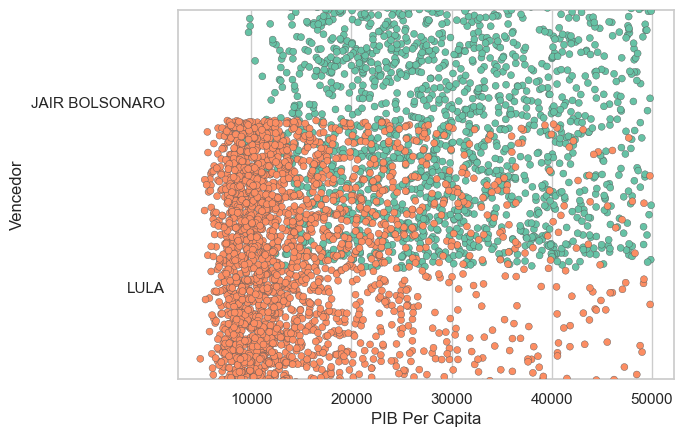

In [39]:
sns.stripplot(y="Vencedor", x="PIB Per Capita", data=final_df, jitter=0.9, palette="Set2", linewidth=0.3)

<AxesSubplot:xlabel='PIB Per Capita', ylabel='Vencedor'>

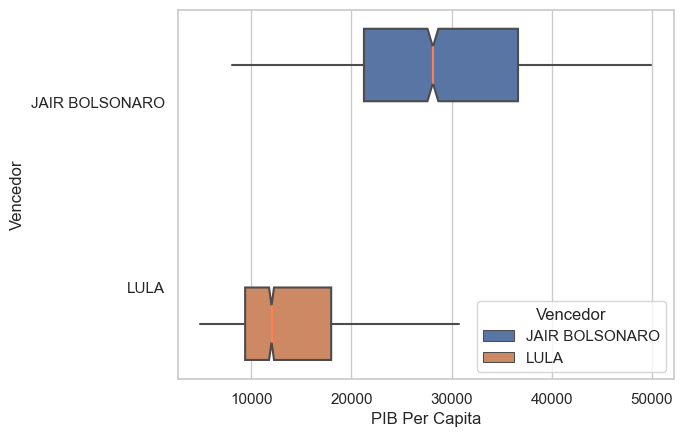

In [40]:
sns.boxplot(data=final_df, x="PIB Per Capita", y="Vencedor", hue="Vencedor", notch=True, showcaps=False,medianprops={"color": "coral"}, showfliers=False)